In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Exploratory Data Analysis

In [31]:
df.shape

(7043, 21)

In [32]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [33]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

## Inference:
            1.Since senior citizen is categorical the 25,50,75th percentile values are 0
            2.25 percentile of users have a tenure above 55 months

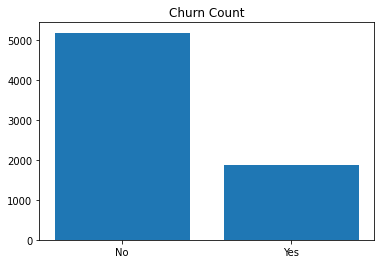

No     5174
Yes    1869
Name: Churn, dtype: int64


In [34]:
a=df['Churn'].value_counts()
plt.bar(a.index,a)
plt.title("Churn Count")
plt.show()   
print(a) 

In [35]:
print(100*df['Churn'].value_counts()/len(df['Churn']))

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


## Inference:
           ratio of churn vs not churning is 73.4:26.5

           Data is imbalanced


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


No missing values

## Data Cleaning

In [37]:
df_copy=df.copy()

Getting a numerical value for total charges

In [38]:
df_copy['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df_copy['TotalCharges'].isnull().sum()

11

Removing missing values

In [39]:
df_copy.dropna(how='any',inplace=True)
df_copy['TotalCharges'].isnull().sum()


0

grouping tenure data for ease in representation in the range of 0-12months,13-24 months .......

In [40]:
col_label=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]

df_copy['tenure_group']=pd.cut(df_copy.tenure,range(1,80,12),right=False,labels=col_label)

In [41]:
df_copy['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

Removing features that are not necessary for model building

In [42]:
df_copy.drop(columns=['customerID','tenure'],axis=1,inplace=True)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


Data Exploration

Univariate Analysis

dropping numerical data and churn data for hue

Generating count plot(using sns countplot) with Churn as hue by iterating through all feature by accessing each features iteratively through enumerate method

In [43]:
X=enumerate(df_copy.drop(columns=['Churn','TotalCharges','MonthlyCharges']))
print(*X)

(0, 'gender') (1, 'SeniorCitizen') (2, 'Partner') (3, 'Dependents') (4, 'PhoneService') (5, 'MultipleLines') (6, 'InternetService') (7, 'OnlineSecurity') (8, 'OnlineBackup') (9, 'DeviceProtection') (10, 'TechSupport') (11, 'StreamingTV') (12, 'StreamingMovies') (13, 'Contract') (14, 'PaperlessBilling') (15, 'PaymentMethod') (16, 'tenure_group')


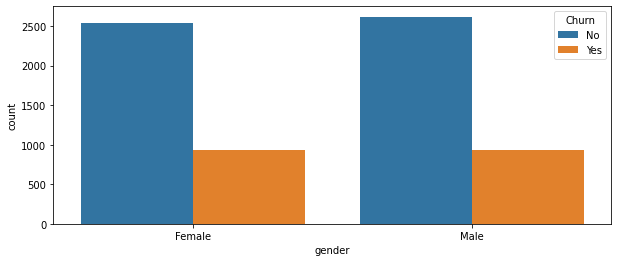

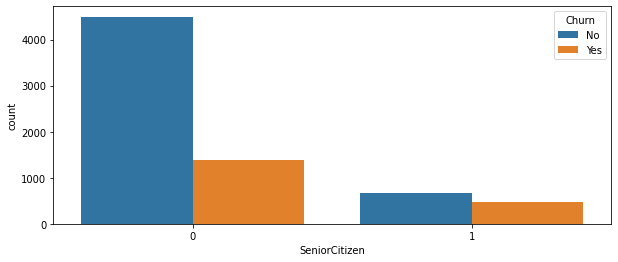

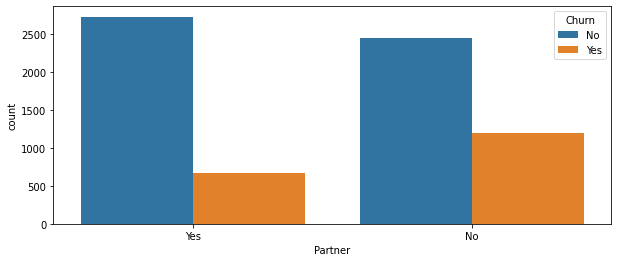

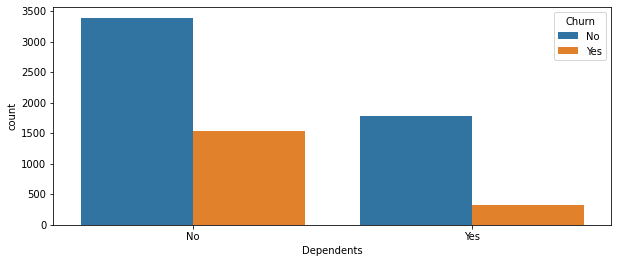

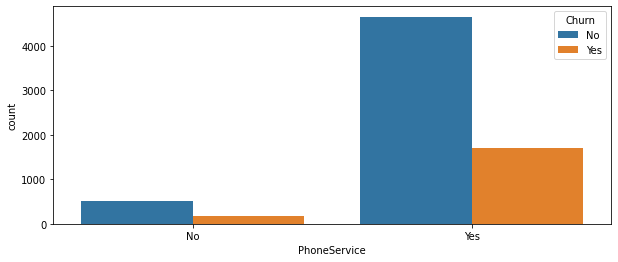

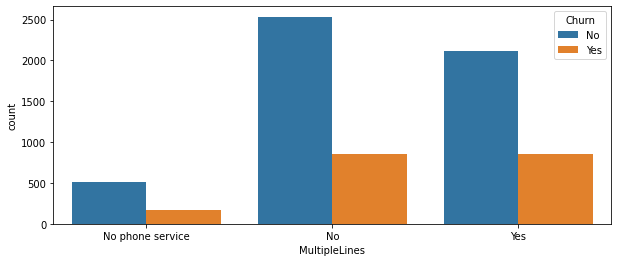

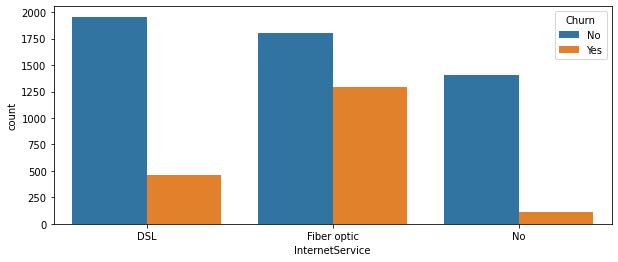

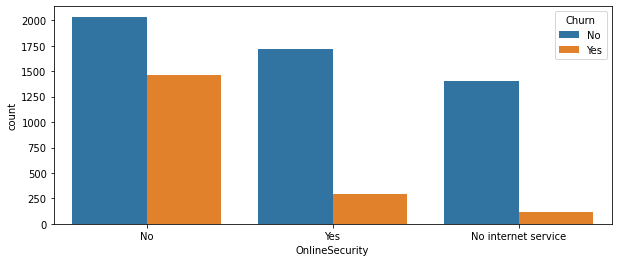

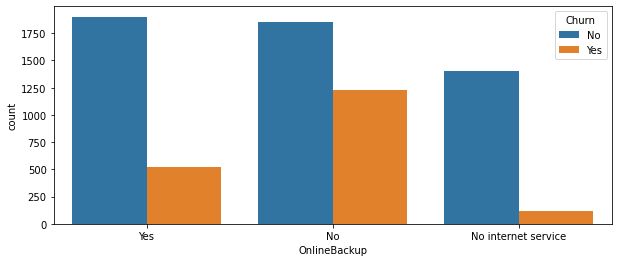

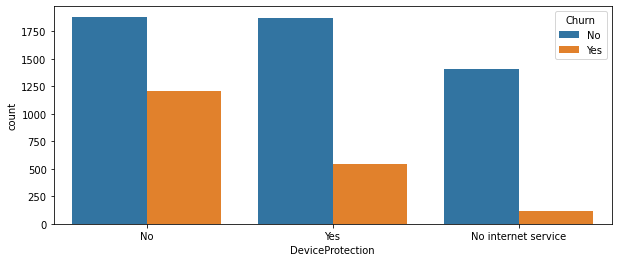

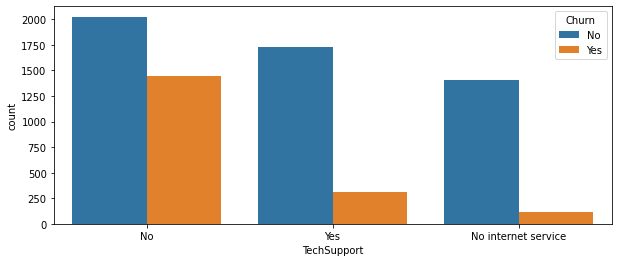

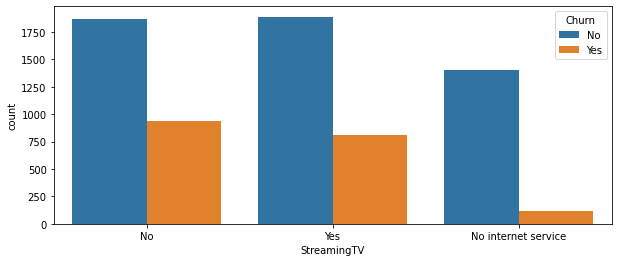

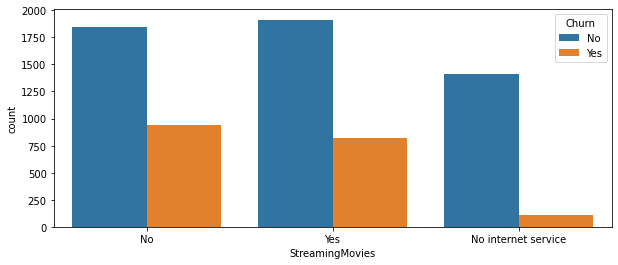

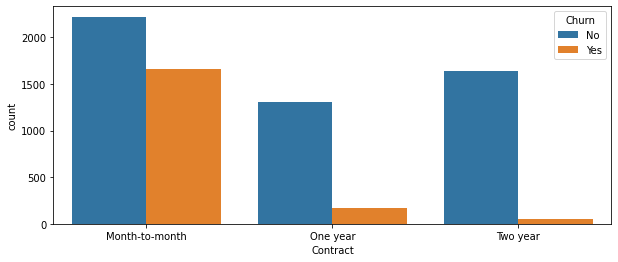

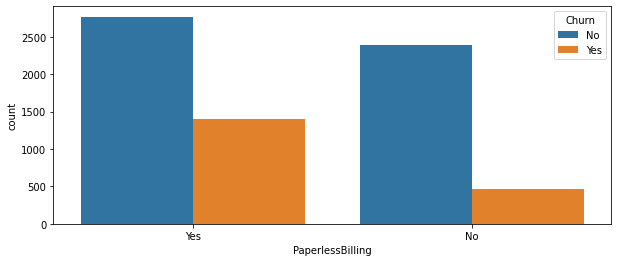

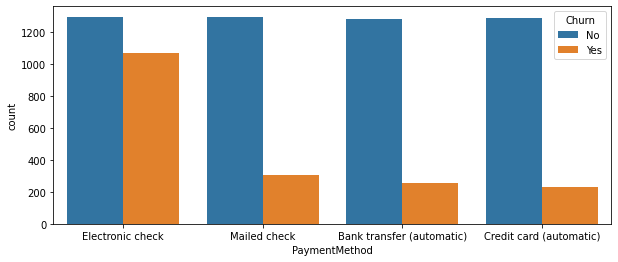

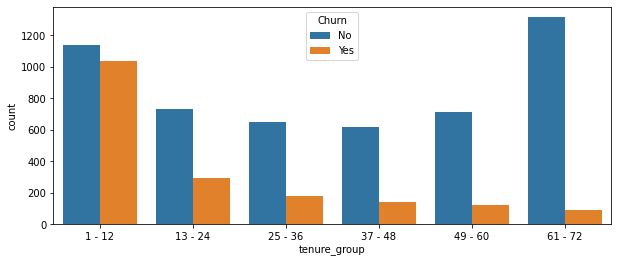

In [44]:
for i,featurename in enumerate(df_copy.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    
    plt.figure(i,figsize=(10, 4))    
    sns.countplot(data=df_copy,x=featurename,hue='Churn')

Very high churn rate among senior citizens

users without partners are more likely to churn

Electronic check payers have more churn rate

In [45]:
df_copy['Churn']=np.where(df_copy['Churn']=='Yes',1,0)
df_copy['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

Converting categorical data into numeric
               Method used: one-hot encoding

In [46]:
df_copy_d=pd.get_dummies(df_copy)
df_copy_d.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


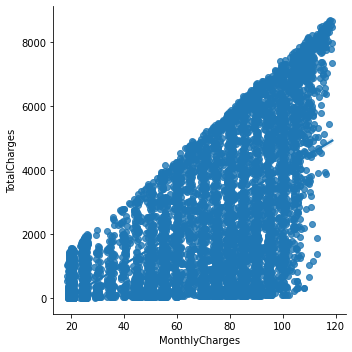

In [47]:
sns.lmplot(data=df_copy_d,x='MonthlyCharges',y='TotalCharges')

Inference:
           Monthly charges and total charges are linearly dependent

Kernel Density estimation plot for analysing churn by monthly charges

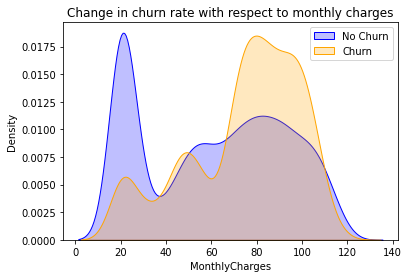

In [48]:
kernel_plot=sns.kdeplot(df_copy_d.MonthlyCharges[(df_copy_d["Churn"]==0)],color="Blue",shade=True)
kernel_plot=sns.kdeplot(df_copy_d.MonthlyCharges[(df_copy_d["Churn"]==1)],color="Orange",shade=True)
kernel_plot.legend(["No Churn","Churn"])
kernel_plot.set_title('Change in churn rate with respect to monthly charges')
plt.show()

Inference:
           Very high churning rate when monthly charges exceeds above 60

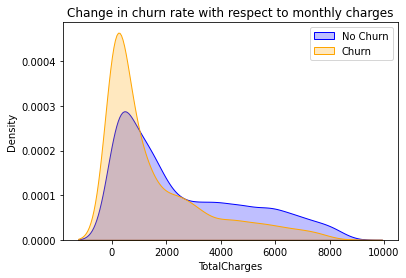

In [49]:
kernel_plot=sns.kdeplot(df_copy_d.TotalCharges[(df_copy_d["Churn"]==0)],color="Blue",shade=True)
kernel_plot=sns.kdeplot(df_copy_d.TotalCharges[(df_copy_d["Churn"]==1)],color="Orange",shade=True)
kernel_plot.legend(["No Churn","Churn"])
kernel_plot.set_title('Change in churn rate with respect to monthly charges')
plt.show()

Insight:

       1.High density of churn at lower total charges

11. Co-relation of features with 'Churn'

In [50]:
print(df_copy_d.corr()['Churn'].sort_values(ascending=False))

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
tenure_group_1 - 12                        0.319628
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
tenure_group

**Churn rate** and Month-to-Month contracts 
Contract_Month-to-month , No OnlineSecurity ,No TechSupport,
1 Year Tenure_group,
Fiber optic Internet,
Electronic check Payment method
have **high positive correlation**

**Churn Rate** and Tenure group with 5+ years and No internet service have significant **Negative Correlation**



## Correlation Heatmap

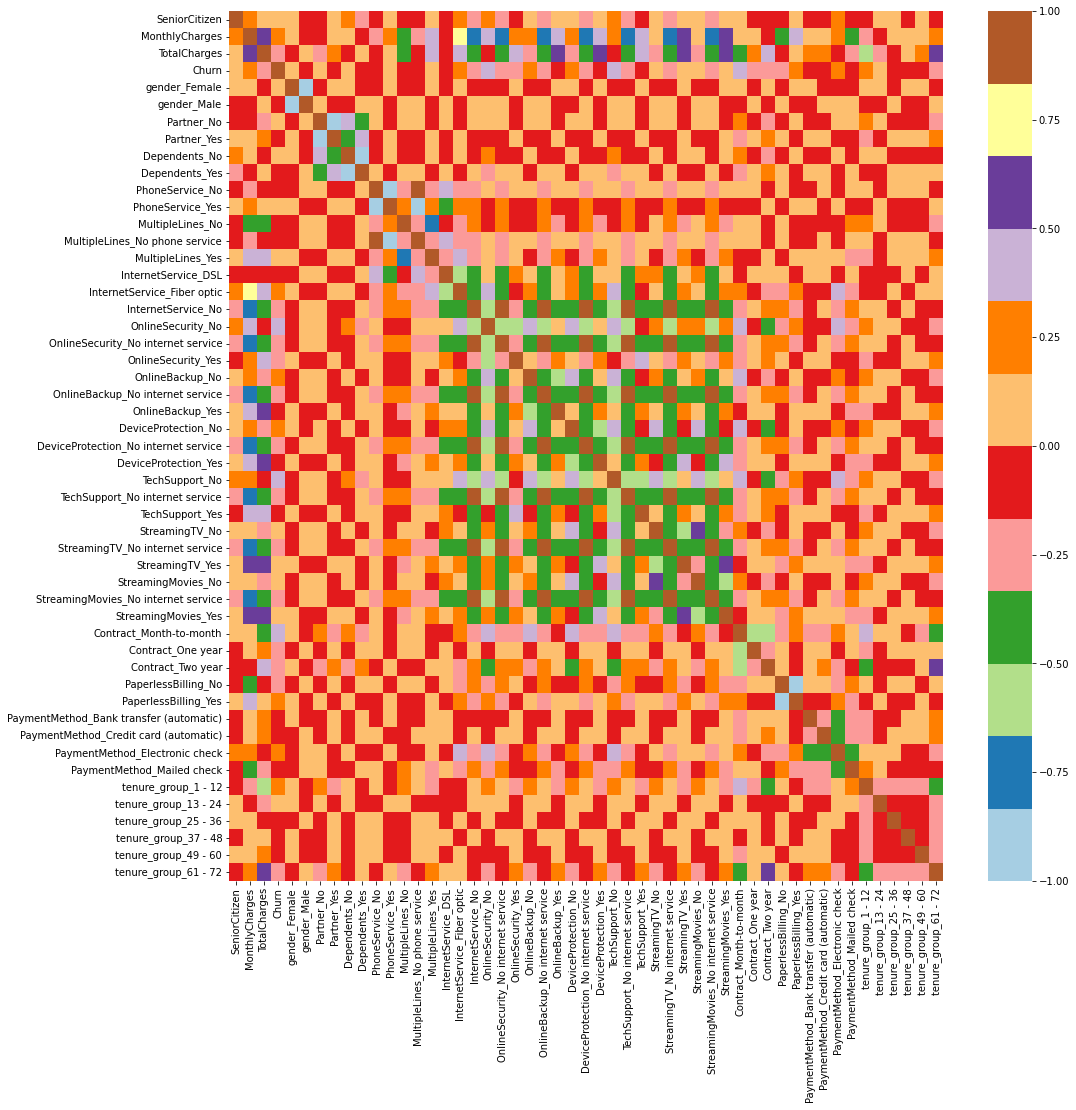

In [51]:
plt.figure(figsize=(16,16))
sns.heatmap(df_copy_d.corr(),cmap="Paired")

## Bivariate Analysis

In [52]:
new_df=df_copy.loc[df_copy['Churn']==1]

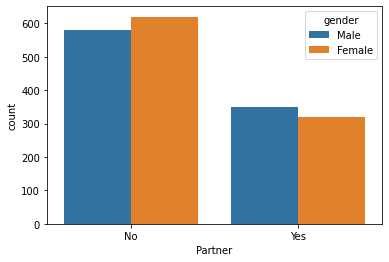

In [53]:
sns.countplot(data=new_df,x='Partner',order=new_df['Partner'].value_counts().index,hue='gender')

Churn rate with respect to each feature and among male and female in each feature

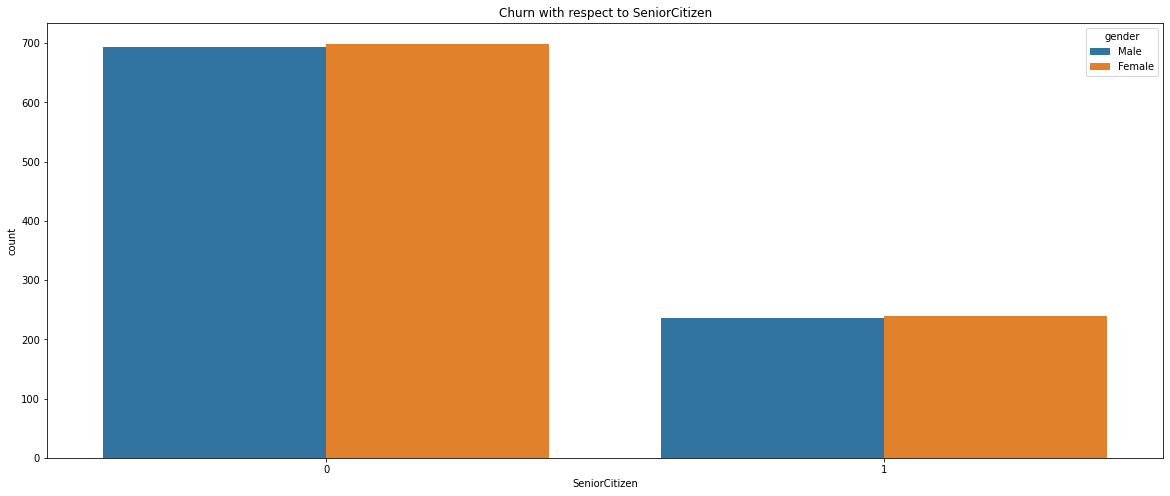

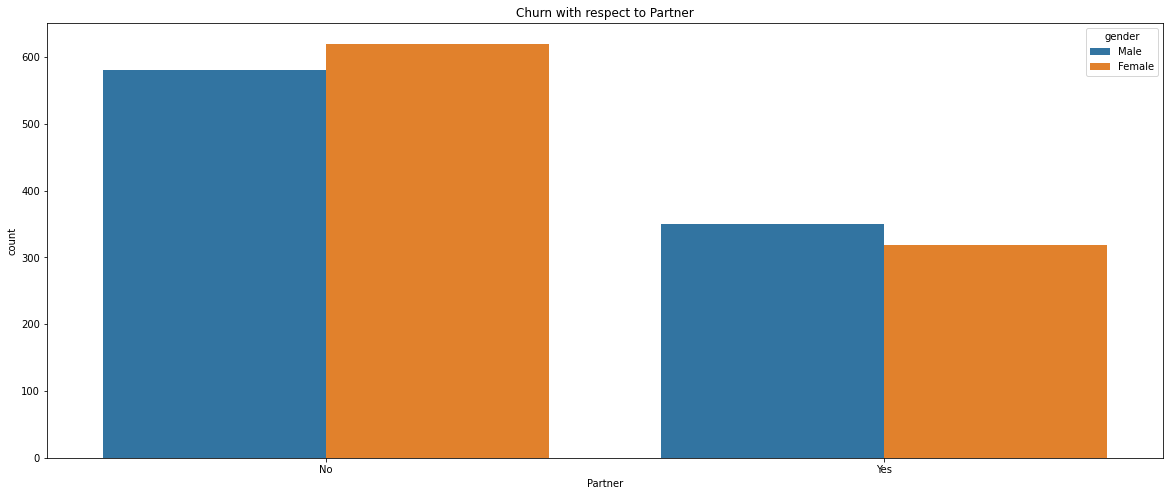

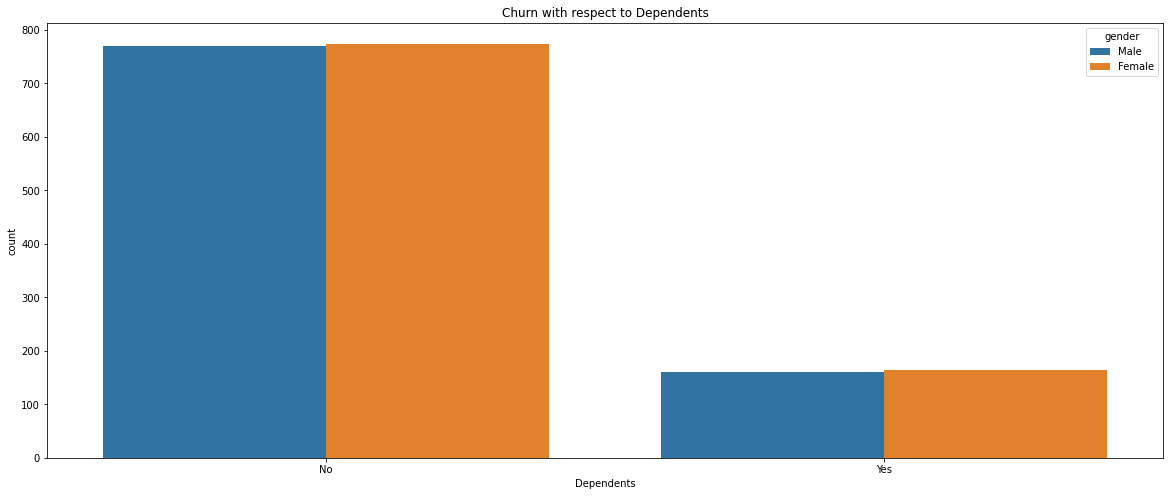

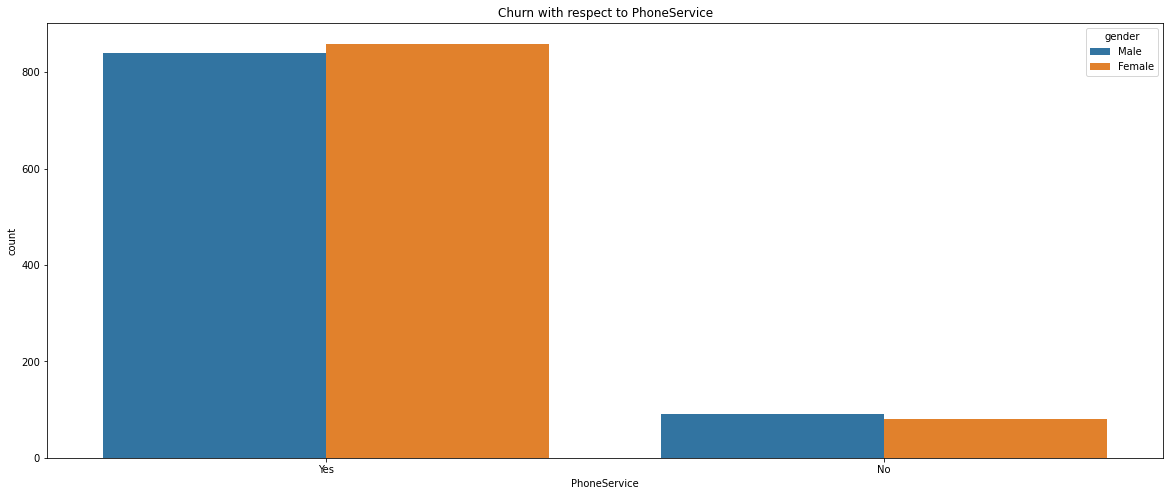

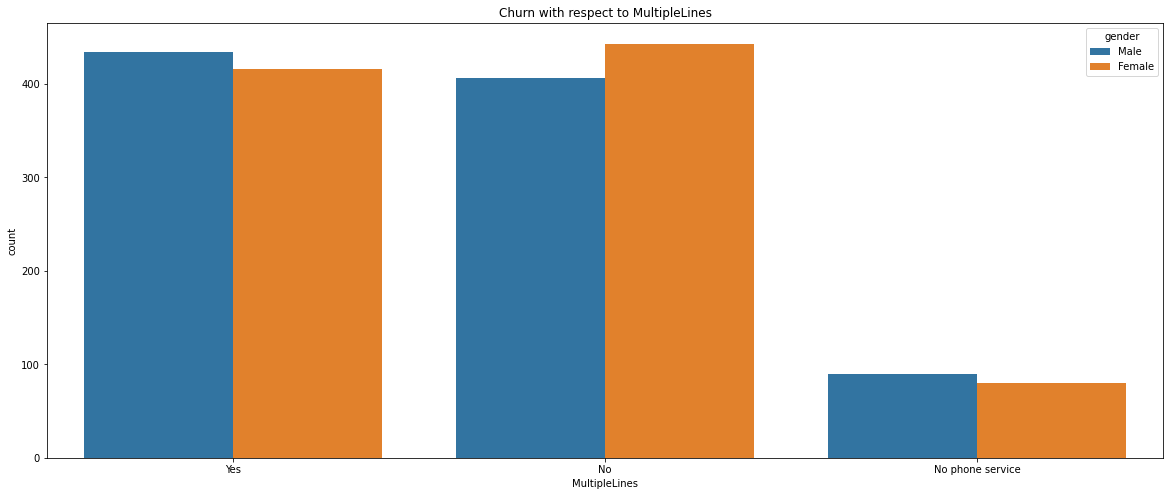

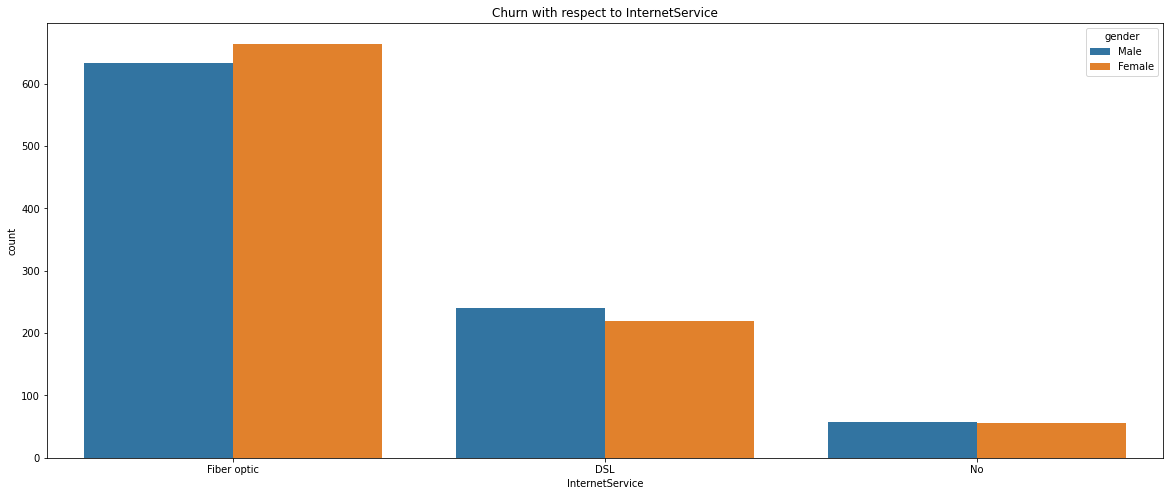

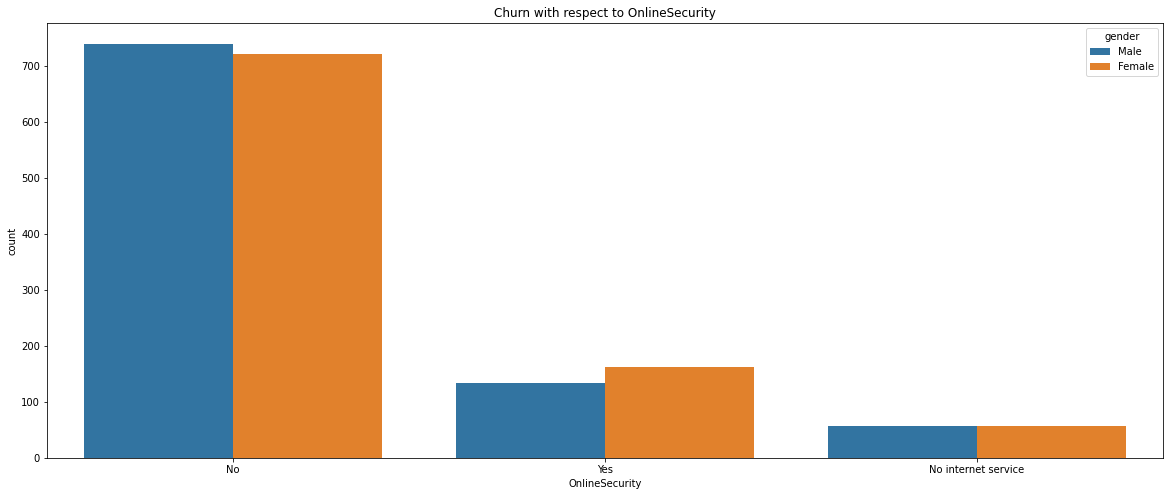

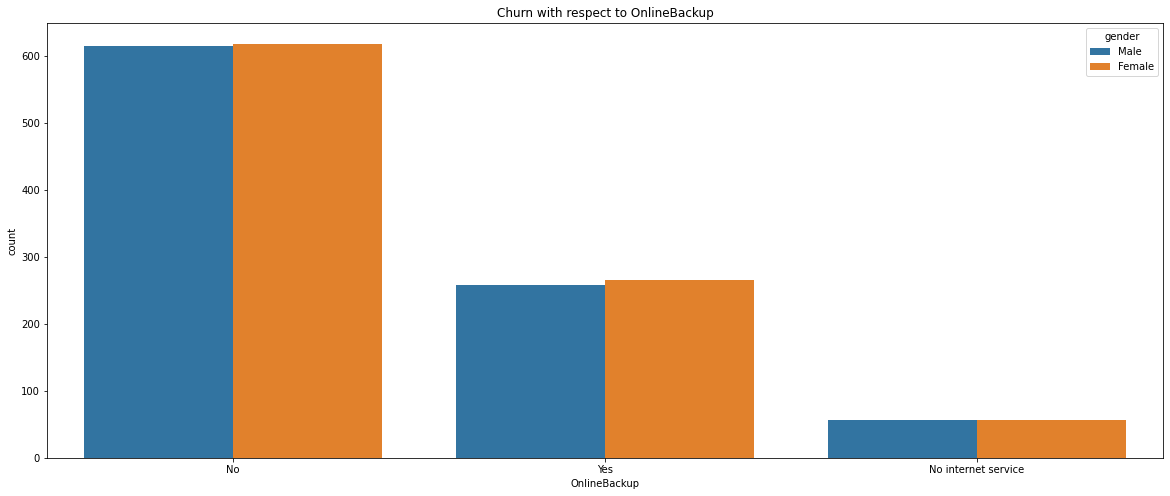

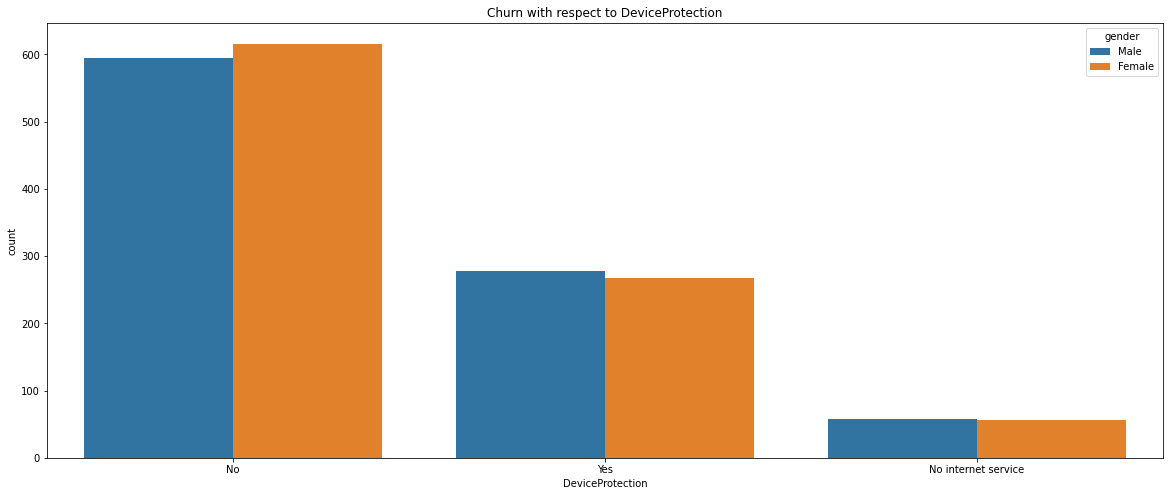

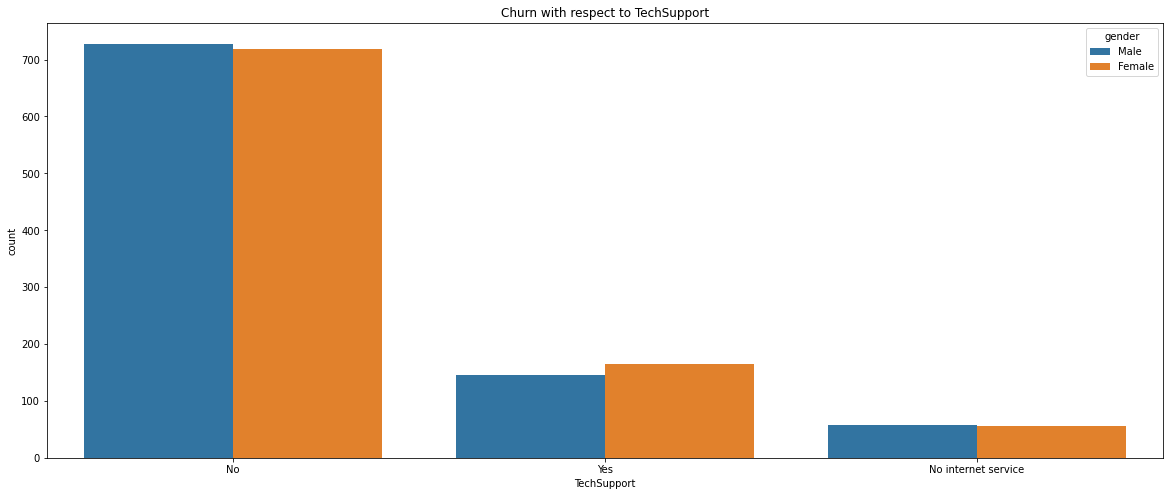

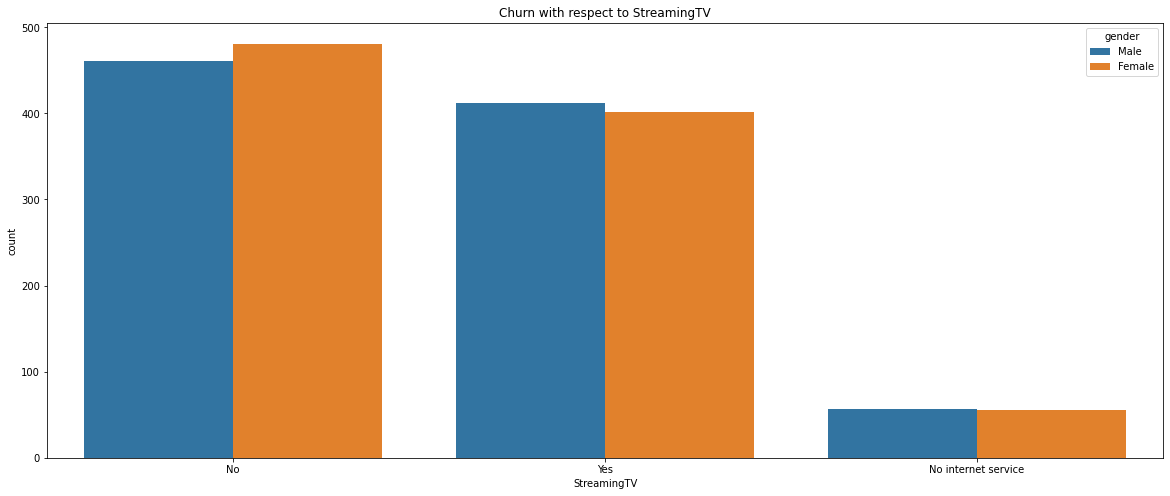

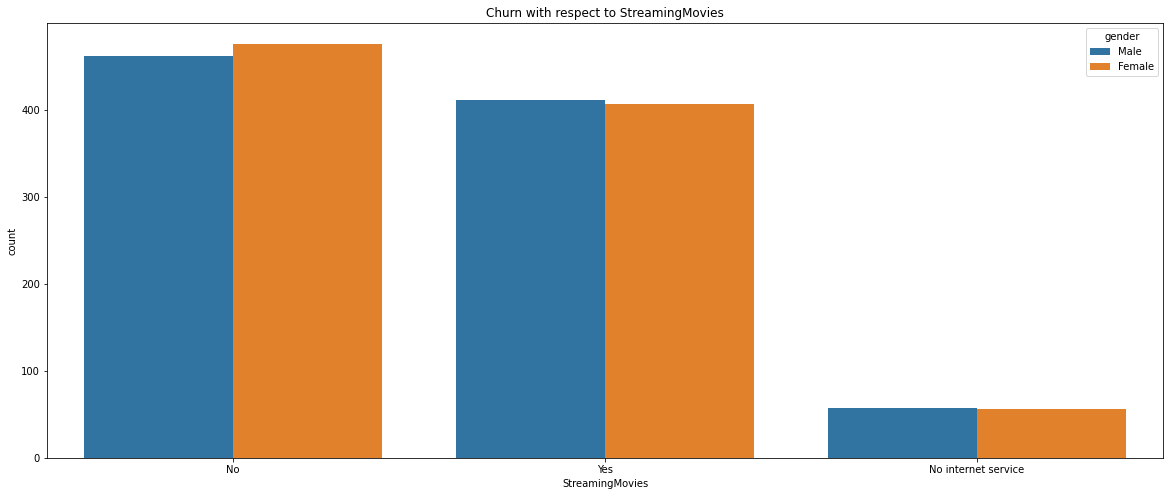

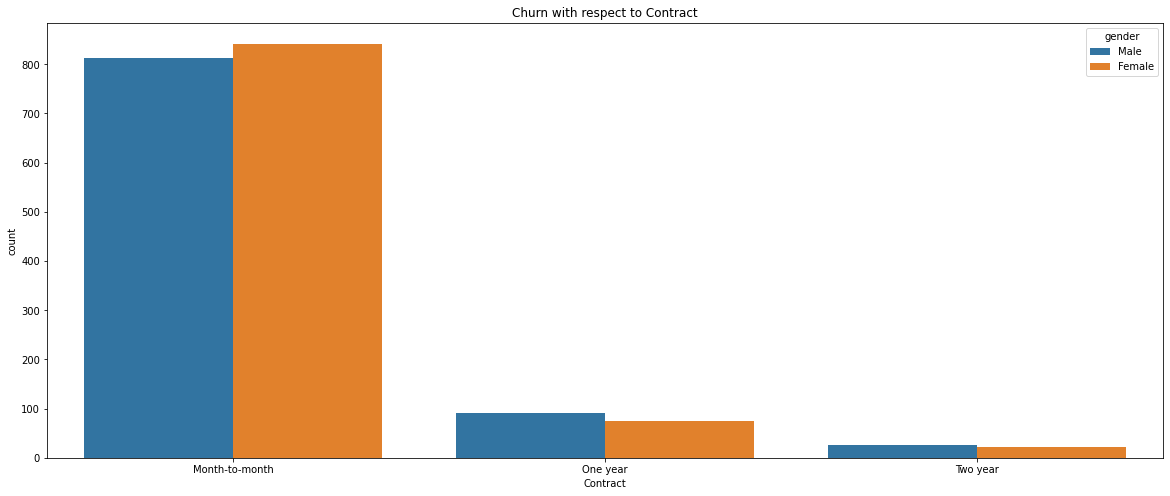

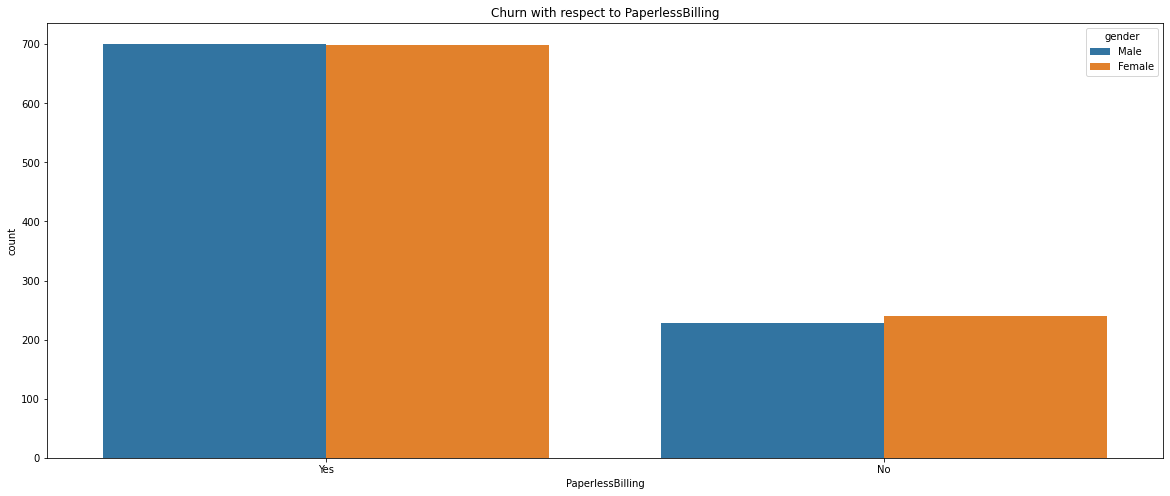

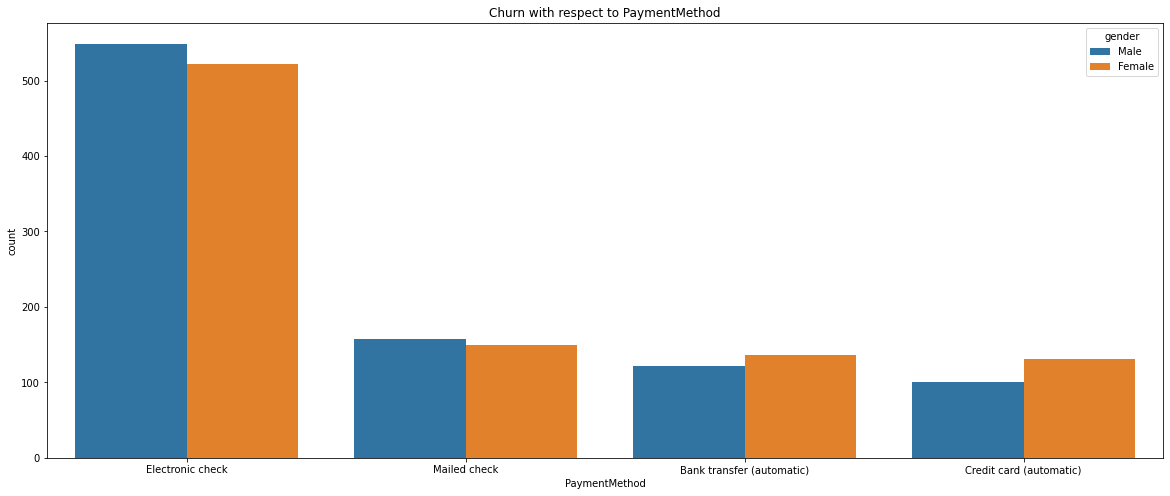

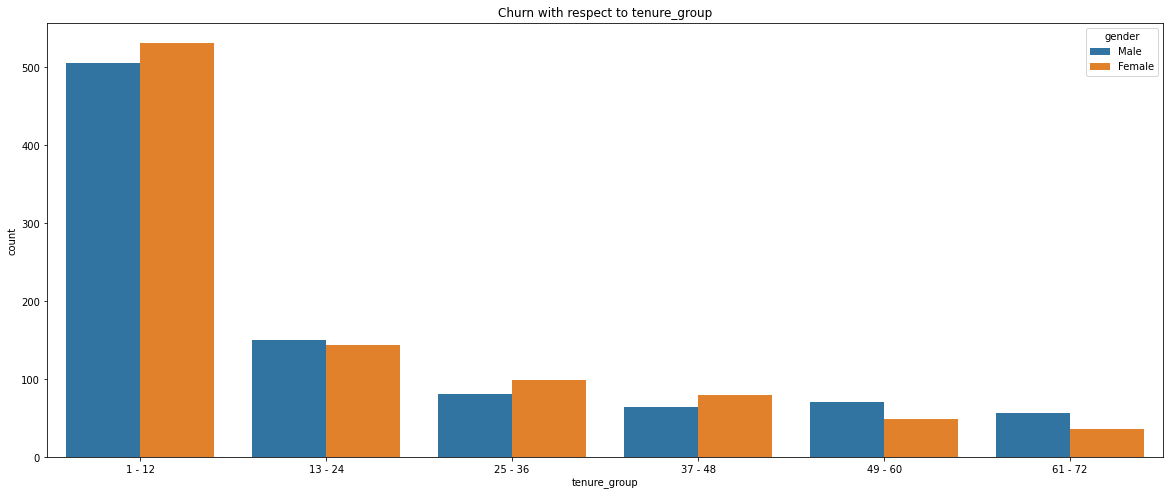

In [54]:
for i,featurename in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges','gender'])):
    
    plt.figure(i,figsize=(20, 8)) 
    plt.title("Churn with respect to " + featurename)   
    sns.countplot(data=new_df,x=featurename,order=new_df[featurename].value_counts().index,hue='gender')
    

## Conclusion

Insights:

          1. High level churning from electronic check payers

          2. User who lack technical support, device protection ,Online backup,
          Online security are more likely to churn

          3. Fibre optics internet users have high churning rate

          4. Senior citizens are less likely to churn

          5. Monthly contract users have high churning rates


## Model Building

In [55]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [56]:
df_copy_d.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Separating data and labels

In [57]:
X=df_copy_d.drop('Churn',axis=1)
X

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [58]:
Y=df_copy_d['Churn']
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [63]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [64]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
model_dt.score(x_test,y_test)

0.7818052594171997

In [66]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1042
           1       0.60      0.50      0.54       365

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

